# NSHUTI MUGABO Arsene
# ID: 27668
***29/7/2025***
# INTRO TO BIG DATA: FINAL EXAM CAPSTONE PROJECT

## IMPORTING OR LOADING AND CLEANING DATASET

In [1]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("carvana.csv")  

# Step 3: Display the first few rows
print("Original Dataset Preview:")
print(df.head())

# Step 4: Convert 'Year' column to numeric (handle errors)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Step 5: Drop rows with missing values (caused by invalid year or missing data)
df_cleaned = df.dropna().copy()

# Step 6: Convert 'Year' to integers
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

# Step 7: Remove extreme outliers in 'Year' column (e.g., Year > 2025)
df_cleaned = df_cleaned[df_cleaned['Year'] <= 2025]

# Optional: Remove cars with extremely high mileage or price (above 99th percentile)
mileage_99 = df_cleaned['Miles'].quantile(0.99)
price_99 = df_cleaned['Price'].quantile(0.99)
df_cleaned = df_cleaned[(df_cleaned['Miles'] <= mileage_99) & (df_cleaned['Price'] <= price_99)]

# Step 8: Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Step 9: Show cleaned data summary
print("\nCleaned Dataset Preview:")
print(df_cleaned.head())
print("\nSummary Statistics:")
print(df_cleaned.describe())


Original Dataset Preview:
              Name   Year  Miles  Price
0   Chevrolet Trax   2018  41946  16990
1      GMC Terrain   2020  45328  23990
2    Jeep Wrangler   2012  81068  21590
3    Jeep Renegade   2019  35372  21590
4            BMW X  20173  68992  22990

Cleaned Dataset Preview:
              Name  Year  Miles  Price
0   Chevrolet Trax  2018  41946  16990
1      GMC Terrain  2020  45328  23990
2    Jeep Wrangler  2012  81068  21590
3    Jeep Renegade  2019  35372  21590
4     Buick Encore  2019  47973  18590

Summary Statistics:
               Year          Miles         Price
count  18766.000000   18766.000000  18766.000000
mean    2016.138762   55190.366301  19959.158531
std        2.995339   25337.462008   4815.653747
min     2009.000000     372.000000  10990.000000
25%     2014.000000   35929.000000  16590.000000
50%     2016.000000   53002.000000  18990.000000
75%     2019.000000   73979.000000  22590.000000
max     2023.000000  105344.000000  43990.000000


 ## Exploratory Data Analysis (EDA)

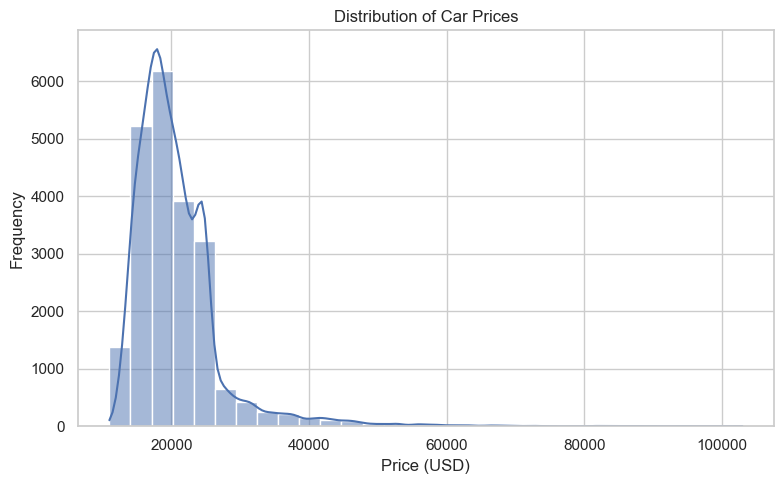

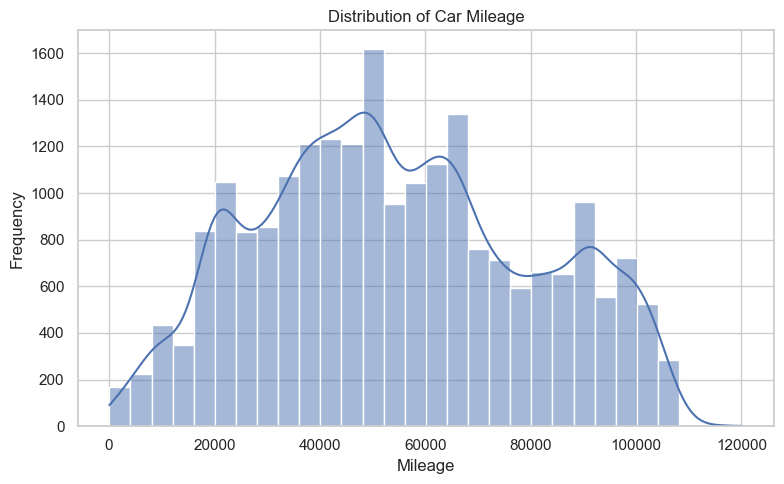

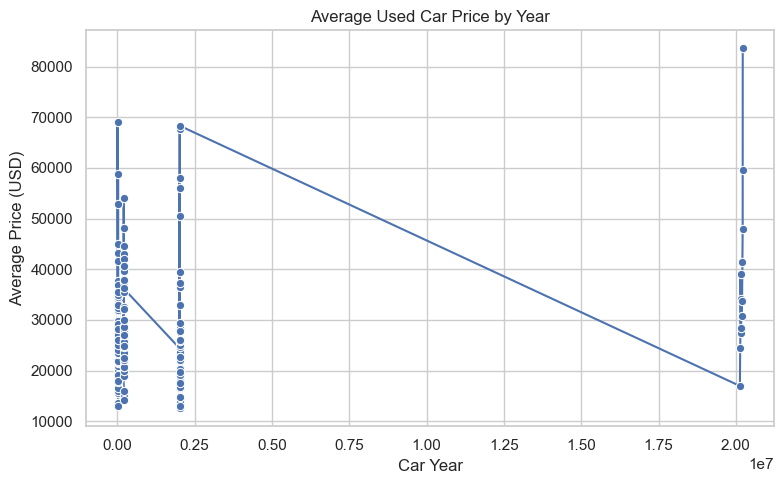

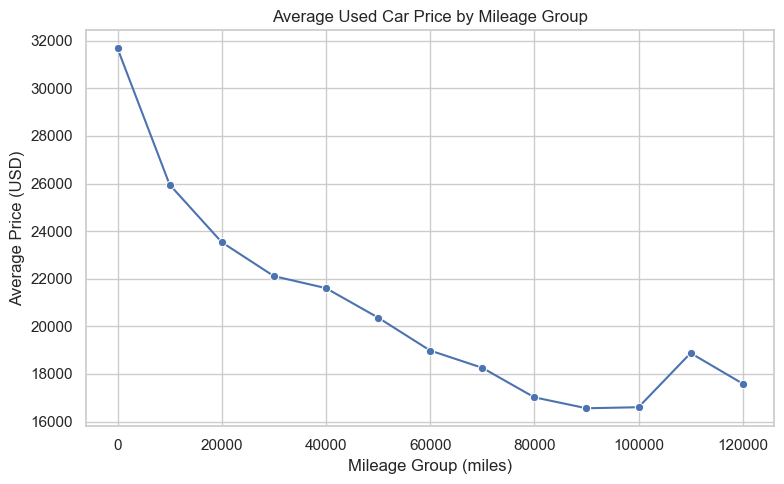

In [16]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_cleaned=pd.read_csv('carvana.csv')

# Optional: Set up the theme for seaborn
sns.set(style="whitegrid")

# 1. Histogram of Car Prices
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Histogram of Car Mileage
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Miles'], bins=30, kde=True)
plt.title("Distribution of Car Mileage")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Scatter Plot: Year vs Price
avg_price_by_year = df_cleaned.groupby('Year')['Price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_price_by_year, x='Year', y='Price', marker='o')
plt.title("Average Used Car Price by Year")
plt.xlabel("Car Year")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show()

# 4. Line Plot: Mileage vs Price
df_cleaned['MileageGroup'] = (df_cleaned['Miles'] // 10000) * 10000
avg_price_by_mileage = df_cleaned.groupby('MileageGroup')['Price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_price_by_mileage, x='MileageGroup', y='Price', marker='o')
plt.title("Average Used Car Price by Mileage Group")
plt.xlabel("Mileage Group (miles)")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show()

# MACHINE LEARNING AND EVALUATION

In [8]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("carvana.csv")  # Replace with your actual path

# Clean the dataset
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_cleaned = df.dropna().copy()
df_cleaned['Year'] = df_cleaned['Year'].astype(int)
df_cleaned = df_cleaned[df_cleaned['Year'] <= 2025]

# Remove extreme outliers (top 1% in Mileage and Price)
mileage_99 = df_cleaned['Miles'].quantile(0.99)
price_99 = df_cleaned['Price'].quantile(0.99)
df_cleaned = df_cleaned[(df_cleaned['Miles'] <= mileage_99) & (df_cleaned['Price'] <= price_99)]

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Select features and target
X = df_cleaned[['Year', 'Miles']]
y = df_cleaned['Price']

# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Display model results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R²):", r2)


Model Coefficients: [ 6.08256035e+02 -6.05683601e-02]
Model Intercept: -1203040.644605369
Root Mean Squared Error (RMSE): 3914.87283980634
R-squared Score (R²): 0.37376494194823295


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
# SAVE CLEANED DATA WITH CLUSTERS/FORECASTS
df.to_csv('carvana_cleaned.csv', index=False)